In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 1번 
데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem1.csv     
데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기 

In [10]:
from sklearn.model_selection import train_test_split

### 1-1 EDA 및 데이터 전처리
시각화 및 통계량 제시

In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem1.csv')
df.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


In [135]:
df.shape

(1460, 13)

In [134]:
df.isna().sum()

Id                0
LotArea           0
LotFrontage     259
YearBuilt         0
1stFlrSF          0
2ndFlrSF          0
YearRemodAdd      0
TotRmsAbvGrd      0
KitchenAbvGr      0
BedroomAbvGr      0
GarageCars        0
GarageArea        0
price             0
dtype: int64

In [137]:
df.drop('Id', axis=1, inplace=True)

In [144]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [145]:
df.isna().sum()

LotArea         0
LotFrontage     0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
YearRemodAdd    0
TotRmsAbvGrd    0
KitchenAbvGr    0
BedroomAbvGr    0
GarageCars      0
GarageArea      0
price           0
dtype: int64

In [146]:
x_col = list(df.columns.difference(['price']))
len(x_col)

11

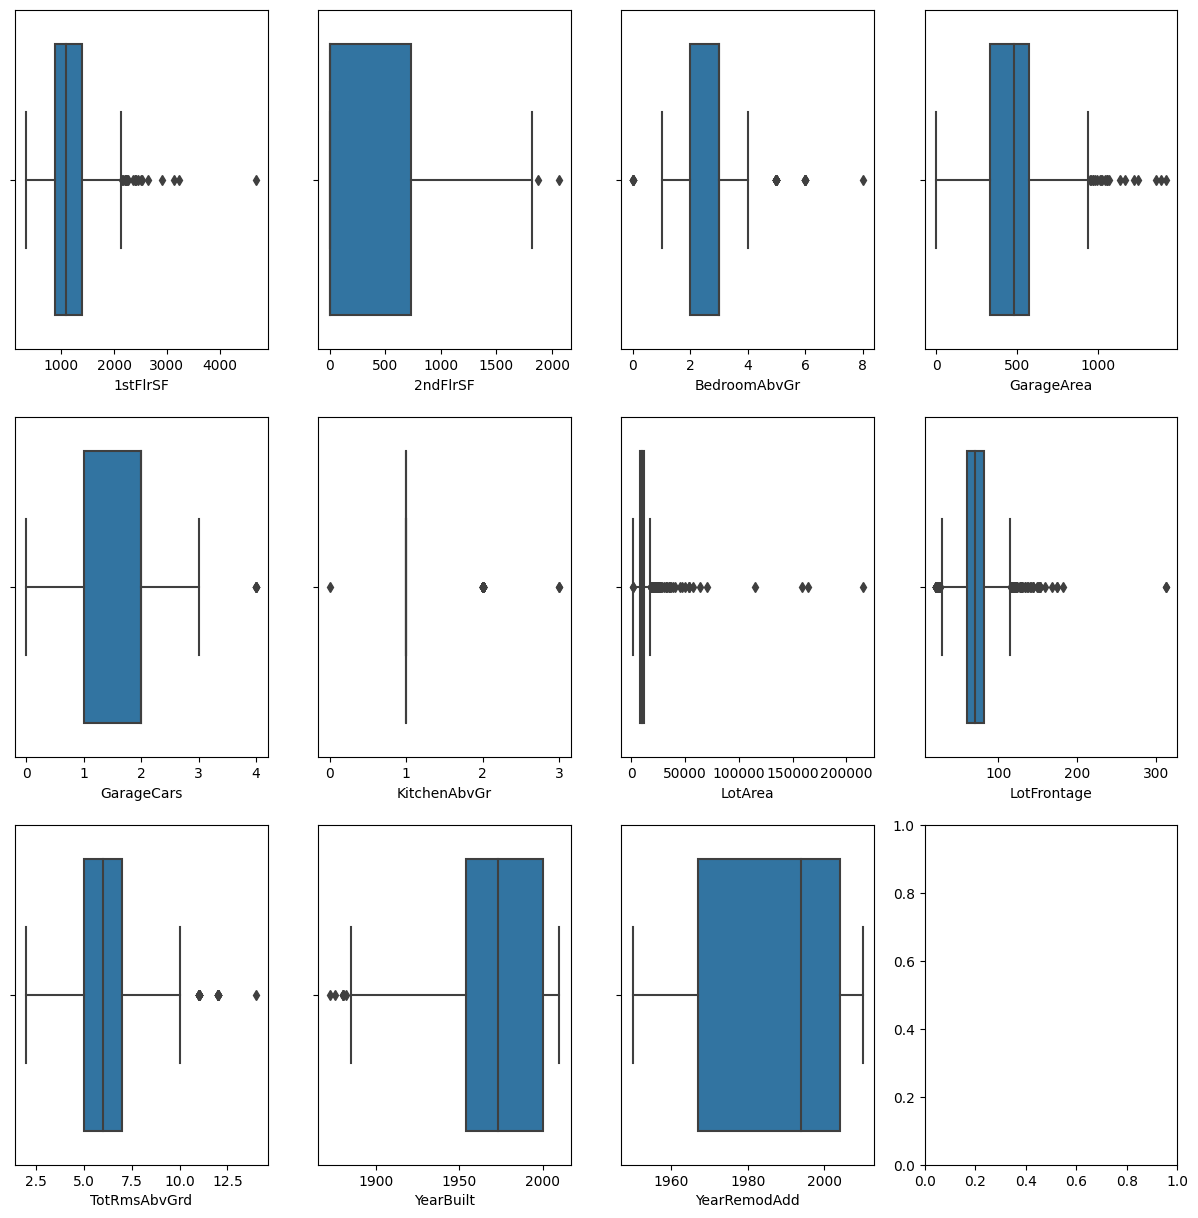

In [147]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
for i in range(len(x_col)):
    row_ = i//4
    col_ = i%4
    sns.boxplot(x=x_col[i], data=df, ax=axes[row_][col_])

<Axes: xlabel='KitchenAbvGr'>

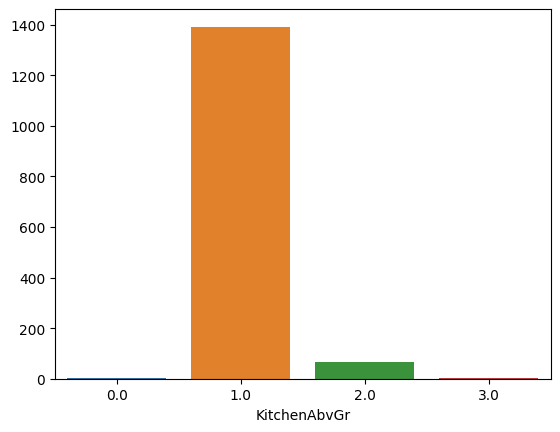

In [148]:
sns.barplot(x=df['KitchenAbvGr'].value_counts().index, y=df['KitchenAbvGr'].value_counts().values)

In [149]:
df['BuiltAge'] = 2023 - df['YearBuilt'] + 1
df['RemodAddAge'] = 2023 - df['YearRemodAdd'] + 1
df['KitchenAbvGr_1'] = np.where(df['KitchenAbvGr']==1, 1, 0)

In [150]:
print('''
ID 변수는 집의 고유번호이므로 분석에서 활용되기 어렵다. 그러므로 Id 변수는 제거하고, 나머지 독립변수들의 분포를 확인해 본다. 독립변수의 개수는 총 11개이다.
LotFrontAge 변수에는 결측치가 존재한다, 수치형 변수로 구성된 dataset이고, data 대비 결측치의 비율이 높은 편이므로, KNNImputer를 사용하여 결측치를 보정한다.
YearBuilt와 YearRemodAdd 변수는 건축 연도와 리모델링 연도인데, 연식과 관련된 변수로 집값에 영향을 줄 것으로 생각된다. 연식을 더 직관적으로 나타내기 위해 연도를 현재 시점 기준으로 환산하여 건축물의 나이 변수로 변경한다.
KitchenAbvGr 변수는 각 개수별로 명확히 구분되는 것이 보이고, 1 값을 가지는 개수가 매우 많은 불균형 데이터이므로, 카테고리 변수로 변경하고, 1인지 아닌지를 나타내는 파생변수를 생성하는 것이 타당해 보인다.

그리고, boxplot에서 skewed 분포 모양과 함께 IQR 기준 이상치가 보이는 일부 변수가 존재한다. 실제로 제거할 수 있는 대상인지는 현재로써는 확신할 수 없으므로, 이상치의 영향을 줄이기 위해 로그 변환을 수행한다.
대상 변수는 1stFlrSF', '2ndFlrSF', 'BedroomAbvGr','GarageArea', 'GarageCars', 'LotArea', 'LotFrontage', 'TotRmsAbvGrd' 7개이다.
''')


ID 변수는 집의 고유번호이므로 분석에서 활용되기 어렵다. 그러므로 Id 변수는 제거하고, 나머지 독립변수들의 분포를 확인해 본다. 독립변수의 개수는 총 11개이다.
LotFrontAge 변수에는 결측치가 존재한다, 수치형 변수로 구성된 dataset이고, data 대비 결측치의 비율이 높은 편이므로, KNNImputer를 사용하여 결측치를 보정한다.
YearBuilt와 YearRemodAdd 변수는 건축 연도와 리모델링 연도인데, 연식과 관련된 변수로 집값에 영향을 줄 것으로 생각된다. 연식을 더 직관적으로 나타내기 위해 연도를 현재 시점 기준으로 환산하여 건축물의 나이 변수로 변경한다.
KitchenAbvGr 변수는 각 개수별로 명확히 구분되는 것이 보이고, 1 값을 가지는 개수가 매우 많은 불균형 데이터이므로, 카테고리 변수로 변경하고, 1인지 아닌지를 나타내는 파생변수를 생성하는 것이 타당해 보인다.

그리고, boxplot에서 skewed 분포 모양과 함께 IQR 기준 이상치가 보이는 일부 변수가 존재한다. 실제로 제거할 수 있는 대상인지는 현재로써는 확신할 수 없으므로, 이상치의 영향을 줄이기 위해 로그 변환을 수행한다.
대상 변수는 1stFlrSF', '2ndFlrSF', 'BedroomAbvGr','GarageArea', 'GarageCars', 'LotArea', 'LotFrontage', 'TotRmsAbvGrd' 7개이다.



In [151]:
log_col = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr','GarageArea', 'LotArea', 'LotFrontage', 'TotRmsAbvGrd']

for col in log_col:
    df[col + '_log'] = np.log1p(df[col])

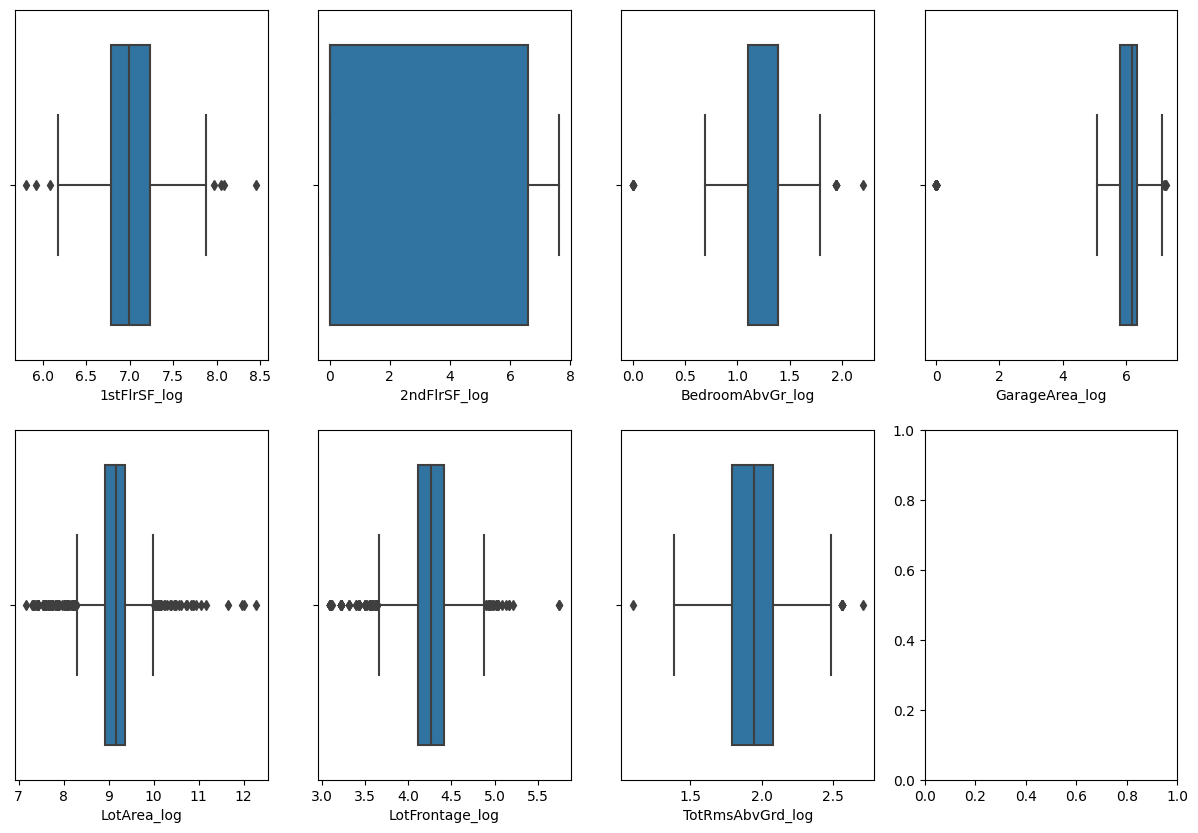

In [152]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for i in range(len(log_col)):
    row_ = i//4
    col_ = i%4
    sns.boxplot(x=log_col[i] + '_log', data=df, ax=axes[row_][col_])

<Axes: xlabel='KitchenAbvGr_1'>

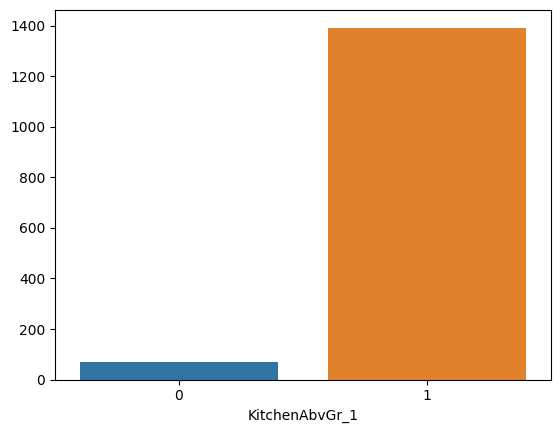

In [153]:
sns.barplot(x=df['KitchenAbvGr_1'].value_counts().index, y=df['KitchenAbvGr_1'].value_counts().values)

In [154]:
print('''
그리고, boxplot에서 skewed 분포 모양과 함께 IQR 기준 이상치가 보이는 일부 변수가 존재한다. 실제로 제거할 수 있는 대상인지는 현재로써는 확신할 수 없으므로, 이상치의 영향을 줄이기 위해 로그 변환을 수행한다.
대상 변수는 1stFlrSF', '2ndFlrSF', 'BedroomAbvGr','GarageArea', 'GarageCars', 'LotArea', 'LotFrontage', 'TotRmsAbvGrd' 7개이다.
로그 변환 수행 결과, 이상치 개수도 일부 줄어들었고, 변수들의 분포가 대칭 분포가 되었을을 확인할 수 있다.
또한, KitchenAbvGr 변수의 경우, 파생 변수 생성을 통해 카테고리의 개수를 줄임으로써 불균형을 일부 완화하였다.
''')


그리고, boxplot에서 skewed 분포 모양과 함께 IQR 기준 이상치가 보이는 일부 변수가 존재한다. 실제로 제거할 수 있는 대상인지는 현재로써는 확신할 수 없으므로, 이상치의 영향을 줄이기 위해 로그 변환을 수행한다.
대상 변수는 1stFlrSF', '2ndFlrSF', 'BedroomAbvGr','GarageArea', 'GarageCars', 'LotArea', 'LotFrontage', 'TotRmsAbvGrd' 7개이다.
로그 변환 수행 결과, 이상치 개수도 일부 줄어들었고, 변수들의 분포가 대칭 분포가 되었을을 확인할 수 있다.
또한, KitchenAbvGr 변수의 경우, 파생 변수 생성을 통해 카테고리의 개수를 줄임으로써 불균형을 일부 완화하였다.



<Axes: xlabel='price'>

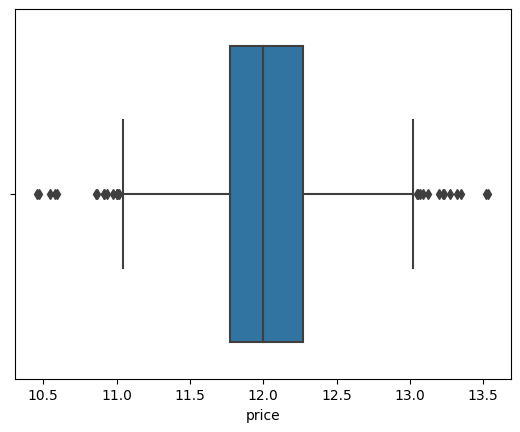

In [155]:
sns.boxplot(x='price', data=df)

In [156]:
print('''
마지막으로, 종속변수인 price의 분포를 Boxplot으로  확인해 보니, 거의 좌우 대칭 형태를 보인다. IQR 기준으로 이상치로 판단되는 데이터도 몇 개 보이지만, 실제로 제거해야 되는 대상인지는 확신할 수 없으므로 별도의 조치는 취하지 않는다.
''')


마지막으로, 종속변수인 price의 분포를 Boxplot으로  확인해 보니, 거의 좌우 대칭 형태를 보인다. IQR 기준으로 이상치로 판단되는 데이터도 몇 개 보이지만, 실제로 제거해야 되는 대상인지는 확신할 수 없으므로 별도의 조치는 취하지 않는다.



### 1-2  Train,Valid,Test set으로 분할 및 시각화 제시

In [157]:
df['firstFlrSF_log'] = df['1stFlrSF_log']
df['secondFlrSF_log'] = df['2ndFlrSF_log']

log_col[0] = 'firstFlrSF'
log_col[1] = 'secondFlrSF'

In [158]:
model_col = ['GarageCars', 'KitchenAbvGr_1','BuiltAge','RemodAddAge'] + [col + '_log' for col in log_col]
model_col

['GarageCars',
 'KitchenAbvGr_1',
 'BuiltAge',
 'RemodAddAge',
 'firstFlrSF_log',
 'secondFlrSF_log',
 'BedroomAbvGr_log',
 'GarageArea_log',
 'LotArea_log',
 'LotFrontage_log',
 'TotRmsAbvGrd_log']

In [159]:
print('''
최종 독립변수 리스트를 위와 같이 정리하였다. 모델링을 위해, 이 데이터를 train, valid, test set으로 분할한다.
''')


최종 독립변수 리스트를 위와 같이 정리하였다. 모델링을 위해, 이 데이터를 train, valid, test set으로 분할한다.



In [160]:
from sklearn.model_selection import train_test_split

In [161]:
x = df.loc[:, model_col]
y = df['price']

x_train, x_tmp, y_train, y_tmp = train_test_split(x, y, test_size=0.4)
x_valid, x_test, y_valid, y_test = train_test_split(x_tmp, y_tmp, test_size=0.5)

<Axes: >

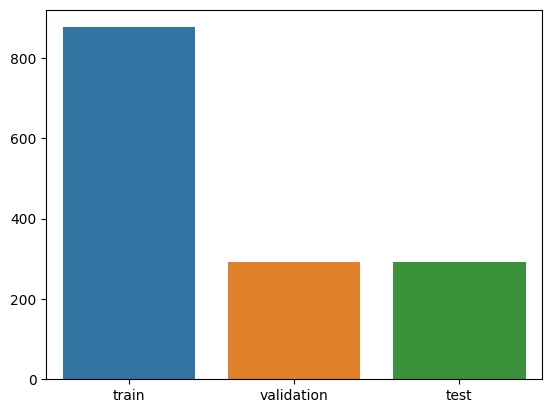

In [163]:
sns.barplot(x=['train', 'validation', 'test'], y=[y_train.count(), y_valid.count(), y_test.count()])

In [164]:
print('''
6:2:2 비율로 데이터를 분할했으며, 분할된 데이터셋의 데이터 개수 count를 시각화하면 위와 같다. 
''')


6:2:2 비율로 데이터를 분할했으며, 분할된 데이터셋의 데이터 개수 count를 시각화하면 위와 같다. 



### 1-3  2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [165]:
from sklearn.preprocessing import RobustScaler

In [166]:
scaler = RobustScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [167]:
x_valid_scaled = pd.DataFrame(scaler.transform(x_valid), columns=x_valid.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [168]:
print('''
회귀분석 모델을 만들기 전에, 각 변수의 scale에 따른 영향력을 없애기 위해 scale을 동일하게 조정해 주었다. 이상치가 존재하므로, 이상치에 민감하지 않은 robust scaler를 사용하여 변환 진행하였다.

''')


회귀분석 모델을 만들기 전에, 각 변수의 scale에 따른 영향력을 없애기 위해 scale을 동일하게 조정해 주었다. 이상치가 존재하므로, 이상치에 민감하지 않은 robust scaler를 사용하여 변환 진행하였다.




In [169]:
from itertools import permutations 

comb = list(permutations(x_train.columns, 2))
variables= '+'.join(list(x_train.columns)) +'+' + '+'.join([':'.join(list(y)) for y in comb])

In [170]:
train_data = pd.concat([x_train_scaled, y_train.reset_index(drop=True)], axis=1)
valid_data = pd.concat([x_valid_scaled, y_valid.reset_index(drop=True)], axis=1)
test_data = pd.concat([x_test_scaled, y_test.reset_index(drop=True)], axis=1)

In [171]:
from statsmodels.formula.api import ols

lm = ols(f'price ~ {variables}', data=train_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     72.80
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.24e-294
Time:                        16:02:04   Log-Likelihood:                 421.17
No. Observations:                 876   AIC:                            -708.3
Df Residuals:                     809   BIC:                            -388.4
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            11.9161      0.016    764.536      0.000      11.886      11.947
GarageCars                            0.0298      0.030      1.005      0.315      -0.028       0.088
KitchenAbvGr_1                        0.1654      0.095      1.741      0.082      -0.021       0.352
BuiltAge                             -0.1353      0.029     -4.656      0.000      -0.192      -0.078
RemodAddAge                          -0.0954      0.025     -3.834      0.000      -0.144      -0.047
firstFlrSF_log                        0.2987      0.027     11.115      0.000       0.246       0.351
secondFlrSF_log                       0.2877      0.025     11.686      0.000       0.239       0.336
BedroomAbvGr_log                     -0.0474      0.018     -2.584      0.010      -0.083      -0.011
GarageArea_log                        0.0044      0.016      0.272      0.786      -0.028       0.037
LotArea_log                           0.0500      0.017      2.989      0.003       0.017       0.083
LotFrontage_log                       0.0363      0.018      1.986      0.047       0.000       0.072
TotRmsAbvGrd_log                      0.0109      0.012      0.877      0.381      -0.013       0.035
GarageCars:KitchenAbvGr_1             0.1240      0.067      1.839      0.066      -0.008       0.256
GarageCars:BuiltAge                  -0.0169      0.032     -0.525      0.600      -0.080       0.046
GarageCars:RemodAddAge               -0.0338      0.033     -1.032      0.302      -0.098       0.030
GarageCars:firstFlrSF_log             0.1412      0.035      4.007      0.000       0.072       0.210
GarageCars:secondFlrSF_log            0.1339      0.047      2.870      0.004       0.042       0.226
GarageCars:BedroomAbvGr_log           0.0038      0.024      0.155      0.877      -0.044       0.051
GarageCars:GarageArea_log            -0.0044      0.007     -0.608      0.544      -0.019       0.010
GarageCars:LotArea_log                0.0050      0.021      0.242      0.809      -0.036       0.046
GarageCars:LotFrontage_log            0.0193      0.022      0.860      0.390      -0.025       0.063
GarageCars:TotRmsAbvGrd_log          -0.0002      0.018     -0.014      0.989      -0.036       0.035
KitchenAbvGr_1:BuiltAge              -0.0509      0.060     -0.849      0.396      -0.169       0.067
KitchenAbvGr_1:RemodAddAge            0.1294      0.076      1.710      0.088      -0.019       0.278
KitchenAbvGr_1:firstFlrSF_log         0.1029      0.100      1.029      0.304      -0.093       0.299
KitchenAbvGr_1:secondFlrSF_log        0.1776      0.118      1.499      0.134      -0.055       0.410
KitchenAbvGr_1:BedroomAbvGr_log      -0.0174      0.032     -0.542      0.588      -0.081       0.046
KitchenAbvGr_1:GarageAr

In [172]:
from itertools import permutations 

comb = list(permutations(x_train.columns.difference(['GarageArea_log', 'TotRmsAbvGrd_log']), 2))
variables= '+'.join(list(x_train.columns.difference(['GarageArea_log', 'TotRmsAbvGrd_log']))) +'+' + '+'.join([':'.join(list(y)) for y in comb])

In [175]:
inter = ['BedroomAbvGr_log:secondFlrSF_log', 'BuiltAge:secondFlrSF_log', 'GarageCars:KitchenAbvGr_1', 'GarageCars:firstFlrSF_log', 'GarageCars:secondFlrSF_log',
         'LotArea_log:firstFlrSF_log',  'LotArea_log:secondFlrSF_log', 'firstFlrSF_log:secondFlrSF_log']

variables= '+'.join(list(x_train.columns.difference(['GarageArea_log', 'TotRmsAbvGrd_log', 'LotFrontage_log']))) +'+'+ '+'.join(inter)

lm = ols(f'price ~ {variables}', data=train_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     258.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.42e-315
Time:                        16:05:22   Log-Likelihood:                 344.16
No. Observations:                 876   AIC:                            -654.3
Df Residuals:                     859   BIC:                            -573.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           11.9188      0.012    956.308      0.000      11.894      11.943
BedroomAbvGr_log                    -0.0537      0.010     -5.481      0.000      -0.073      -0.034
BuiltAge                            -0.1710      0.020     -8.401      0.000      -0.211      -0.131
GarageCars                           0.0738      0.014      5.302      0.000       0.047       0.101
KitchenAbvGr_1                       0.2818      0.028      9.992      0.000       0.226       0.337
LotArea_log                          0.0536      0.008      6.582      0.000       0.038       0.070
RemodAddAge                         -0.1164      0.013     -8.781      0.000      -0.142      -0.090
firstFlrSF_log                       0.3438      0.017     19.837      0.000       0.310       0.378
secondFlrSF_log                      0.3183      0.016     20.270      0.000       0.287       0.349
BedroomAbvGr_log:secondFlrSF_log     0.0668      0.018      3.687      0.000       0.031       0.102
BuiltAge:secondFlrSF_log             0.0605      0.023      2.631      0.009       0.015       0.106
GarageCars:KitchenAbvGr_1            0.1487      0.029      5.155      0.000       0.092       0.205
GarageCars:firstFlrSF_log            0.0712      0.012      5.926      0.000       0.048       0.095
GarageCars:secondFlrSF_log           0.0875      0.021      4.182      0.000       0.046       0.129
LotArea_log:firstFlrSF_log          -0.0238      0.005     -4.389      0.000      -0.034      -0.013
LotArea_log:secondFlrSF_log         -0.0289      0.012     -2.448      0.015      -0.052      -0.006
firstFlrSF_log:secondFlrSF_log      -0.0817      0.024     -3.352      0.001      -0.130      -0.034
==============================================================================
Omnibus:                      195.155   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              991.129
Skew:                          -0.920   Prob(JB):                    6.01e-216
Kurtosis:                       7.875   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
print('''
2차 교호작용을 포함한 회귀식을 생성하고, 선형 회귀 분석을 수행한 후, Backward selection으로 변수를 제거하였다.
먼저, 1차항 중에서 GarageArea_log, TotRmsAbvGrd_log가 유의하지 않은 변수로 판단되어, 이를 제거하고 다시 회귀분석을 수행하였다. 1차항의 제거로, 관련된 변수가 포함된 교호작용항도 제거되었다.
교호작용항의 경우 유의하지 않은 변수가 더 많은 관계로, 유의한 변수들만 리스트로 뽑아서 선택하였다. 
선택 이후, LotFrontage_log 변수가 유의하지 않은 변수로 파악되어 추가로 제거하였다. 교호작용항 중, GarageCars:LotArea_log 변수도 유의하지 않아 제거하였다.
변수 선택 이후, 모든 변수가 유의함을 확인하였고, 변수의 개수는 주효과 변수 8개와 교호작용 변수 8개였다.
유의한 교호작용항은 BedroomAbvGr_log:secondFlrSF_log, BuiltAge:secondFlrSF_log, GarageCars:KitchenAbvGr_1, GarageCars:firstFlrSF_log, GarageCars:secondFlrSF_log, LotArea_log:firstFlrSF_log,
LotArea_log:secondFlrSF_log, firstFlrSF_log:secondFlrSF_log이다.
''')


2차 교호작용을 포함한 회귀식을 생성하고, 선형 회귀 분석을 수행한 후, Backward selection으로 변수를 제거하였다.
먼저, 1차항 중에서 GarageArea_log, TotRmsAbvGrd_log가 유의하지 않은 변수로 판단되어, 이를 제거하고 다시 회귀분석을 수행하였다. 1차항의 제거로, 관련된 변수가 포함된 교호작용항도 제거되었다.
교호작용항의 경우 유의하지 않은 변수가 더 많은 관계로, 유의한 변수들만 리스트로 뽑아서 선택하였다. 
선택 이후, LotFrontage_log 변수가 유의하지 않은 변수로 파악되어 추가로 제거하였다. 교호작용항 중, GarageCars:LotArea_log 변수도 유의하지 않아 제거하였다.
변수 선택 이후, 모든 변수가 유의함을 확인하였고, 변수의 개수는 주효과 변수 8개와 교호작용 변수 8개였다.
유의한 교호작용항은 BedroomAbvGr_log:secondFlrSF_log, BuiltAge:secondFlrSF_log, GarageCars:KitchenAbvGr_1, GarageCars:firstFlrSF_log, GarageCars:secondFlrSF_log, LotArea_log:firstFlrSF_log,
LotArea_log:secondFlrSF_log, firstFlrSF_log:secondFlrSF_log이다.



### 1-4 벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
(평가지표는 MSE, MAPE, R2 모두 확인할 것)

In [183]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [178]:
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()

In [184]:
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    return mape

In [191]:
model_list = [ridge, lasso, rf]

for model in model_list:
    model.fit(x_train_scaled, y_train)
    pred = model.predict(x_test_scaled)

    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    mape = MAPE(y_test, pred)

    print(f"{str(model.__class__()).split('(')[0]} 모델의 MSE는 {mse}, MAPE는 {mape}, R2 score는 {r2}이다.")

Ridge 모델의 MSE는 0.04127317312046926, MAPE는 1.2347375605796007, R2 score는 0.7521091337361413이다.
Lasso 모델의 MSE는 0.16907208280835923, MAPE는 2.6451669819968218, R2 score는 -0.015464087194527298이다.
RandomForestRegressor 모델의 MSE는 0.03899669980611053, MAPE는 1.1190250322773327, R2 score는 0.7657818634842467이다.


In [192]:
print('''
테스트 데이터에 대하여 가장 성능이 좋은 모델은 RandomForest 회귀 모델이며, MSE와 MAPE가 다른 모델에 비해 낮으면서 R2 스코어가 0.77로 가장 높게 나타났다.
''')


테스트 데이터에 대하여 가장 성능이 좋은 모델은 RandomForest 회귀 모델이며, MSE와 MAPE가 다른 모델에 비해 낮으면서 R2 스코어가 0.77로 가장 높게 나타났다.



# 2번
코로나19에 대한 나라별 데이터로 모델링 진행     
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv     
**컬럼**
- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem2.csv')
df.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN


### 2-1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라     

### 2-2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

### 2-3 한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 각각 한개씩 만들어라)

# 3번
설문조사 데이터      
데이터 출처 : 자체 제작    
데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv 

데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)    
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 
모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다

### 3-1 역문항을 변환 한 후 각 그룹`(A~D)`의 영역`(Q1~Q5)`별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. (각 통계량 별로 4x5 dataframe 생성)

In [3]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem3.csv')
df.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,...,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,...,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,...,4,2,1,3,4,1,3,3,2,5
3,3,A,3,3,4,2,2,4,4,3,...,2,3,3,4,2,4,1,1,3,2
4,4,A,3,1,2,3,4,3,4,1,...,5,1,3,2,3,1,3,2,5,4


### 3-2 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

### 3-3 탐색적 요인분석을 수행하고 결과를 시각화 하라   
- 참고 사이트 :https://ysyblog.tistory.com/124